**2. Variables aléatoires normales**

In [1]:
import scipy.stats as st
#from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

La fonction norm(loc, scale) est la distribution de probabilité normale de moyenne loc et écart type scale.

Pour calculer la probabilité qu’une distribution normale soit inférieure à une valeur x on utilise la fonction cdf(x).

In [2]:
st.norm(loc = 5.3, scale = 1).cdf(4.5)

0.21185539858339675

On visualise la distribution normale avec la moyenne et écart type donnés.

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


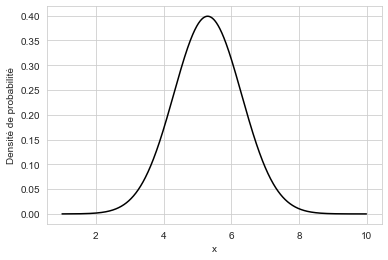

In [3]:
data = np.arange(1,10,0.01)
pdf = st.norm.pdf(data, loc = 5.3, scale = 1)
  
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('x')
plt.ylabel('Densité de probabilité');

La probabilité que *X* soit inférieure à 6 est

In [4]:
st.norm(loc = 4.5, scale = 1.5).cdf(6)

0.8413447460685429

La probabilité que *X* soit supérieure à 2 est égale à 1 moins la probabilité que *X* soit inférieure à 2, donc

In [5]:
1 - st.norm(loc = 4.5, scale = 1.5).cdf(2)

0.9522096477271853

La probabilité que *X* soit comprise entre 1,75 et 5,75 est égale à la probabilité que *X* soit inférieure à 5,75 moins la probabilité que *X* soit inférieure à 1,75, donc

In [6]:
st.norm(loc = 4.5, scale = 1.5).cdf(5.75) - st.norm(loc = 4.5, scale = 1.5).cdf(1.75)

0.7642951114515396

In [7]:
round(st.norm(loc = 4.5, scale = 1.5).cdf(6), 3)

0.841

In [8]:
round(1 - st.norm(loc = 4.5, scale = 1.5).cdf(2), 3)

0.952

In [9]:
round(st.norm(loc = 4.5, scale = 1.5).cdf(5.75) - st.norm(loc = 4.5, scale = 1.5).cdf(1.75), 3)

0.764

La valeur $\beta$ telle que $P(X \leq \beta)$ = 0,35 est obtenue ainsi,

In [10]:
st.norm.ppf(0.35, loc = 4.5, scale = 1.5)

3.9220193003886483

La valeur $\alpha$ telle que $P(X \geq \alpha)$ = 0,40 est égale à la valeur $\beta$ telle que $P(X \leq \beta)$ = 0,60, donc

In [11]:
st.norm.ppf(0.6, loc = 4.5, scale = 1.5)

4.880020654703699

In [12]:
round(st.norm.ppf(0.35, loc = 4.5, scale = 1.5), 3)

3.922

In [13]:
round(st.norm.ppf(0.6, loc = 4.5, scale = 1.5), 3)

4.88

L’intervalle centré en la moyenne (4,5) d’aire 0,55 est obtenu de la façon suivante,

In [14]:
st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)

(3.366877460459296, 5.633122539540704)

On vérifie que l’intervalle est bien centré en 4,5.

In [15]:
4.5 - st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[0]

1.1331225395407039

In [16]:
st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[1] - 4.5

1.1331225395407039

Les deux valeurs sont égales, donc l’intervalle est bien centré en 4,5.

In [17]:
round(st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[0], 3)

3.367

In [18]:
round(st.norm.interval(alpha = 0.55, loc = 4.5, scale = 1.5)[1], 3)

5.633

In [19]:
round(st.norm(loc = 100, scale = 25).cdf(75), 3)

0.159

In [20]:
round(st.norm(loc = 100, scale = 25).cdf(75), 3)

0.159

**3. Théorème de la limite centrale**

Pour une variable aléatoire normale $X$ de moyenne 20 et écart type 25 la probabilité que $X$ soit inférieur à 0 est

In [21]:
round(st.norm(loc = 20, scale = 25).cdf(0), 4)

0.2119

Pour une variable aléatoire $X$ de moyenne 20 et écart type 7,91 la probabilité que $X$ soit inférieur à 0 est

In [22]:
round(st.norm(loc = 20, scale = 7.91).cdf(0), 4)

0.0057

**4. La loi normale comme approximation de la loi binomiale**

In [23]:
from scipy.stats import binom

#calculate binomial probability
binom.pmf(k = 10, n = 12, p = 0.6)


0.06385228185599987

In [24]:
import time

resultat_exact = 0

t1 = time.time()

for i in range(1150, 40001):
    resultat_exact += binom.pmf(k = i, n = 40000, p = 0.03)
    
t2 = time.time()

print("Temps écoulé", round(t2 - t1, 4), "seconds.")

temps_exa = round(t2 - t1, 4)

print("Le résultat exacte est", resultat_exact)


Temps écoulé 7.9354 seconds.
Le résultat exacte est 0.9313335236822504


Pour une variable aléatoire normale $X$ de moyenne 1200 et écart type 34,12 la probabilité que $X$ soit supérieure à 1149,5 est

In [25]:
t3 = time.time()

resultat_approx = round(1 - st.norm(loc = 1200, scale = 34.12).cdf(1149.5), 4)

t4 = time.time()

print("Temps écoulé", round(t4 - t3, 4), "seconds.")

temps_app = round(t4 - t3, 4)

print("Le résultat approximé est", resultat_approx)

Temps écoulé 0.001 seconds.
Le résultat approximé est 0.9306


In [26]:
erreur = resultat_exact - resultat_approx

prop_erreur = (resultat_exact - resultat_approx)/resultat_exact

print("L’erreur d’approximation est", round(prop_erreur*100, 2), "%")

L’erreur d’approximation est 0.08 %


In [27]:
print("La méthode approximée est plus rapide de", temps_exa - temps_app, "seconds.")
print("Elle est plus rapide de", round((t2-t1)/(t4-t3)), "fois.")

La méthode approximée est plus rapide de 7.934399999999999 seconds.
Elle est plus rapide de 7947 fois.


Soit $X$ une variable aléatoire normale de moyenne 30 et écart type 5.

La probabilité que $X$ soit comprise entre 24,5 et 40,5 est

In [28]:
round(st.norm(loc = 30, scale = 5).cdf(40.5) - st.norm(loc = 30, scale = 5).cdf(24.5), 3)

0.846

In [ ]:
#round(st.norm(loc = 550, scale = 15.73).cdf(509.5), 3)